In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mythdata = pd.read_csv('textdata.csv')
mythdata.head(5)

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [16]:
mythdata.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'timestamp'],
      dtype='object')

In [4]:
mythdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1597 non-null   object 
 1   score      1597 non-null   int64  
 2   id         1597 non-null   object 
 3   url        467 non-null    object 
 4   comms_num  1597 non-null   int64  
 5   created    1597 non-null   float64
 6   body       1223 non-null   object 
 7   timestamp  1597 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 99.9+ KB


In [5]:
mythdata.shape

(1597, 8)

<AxesSubplot:>

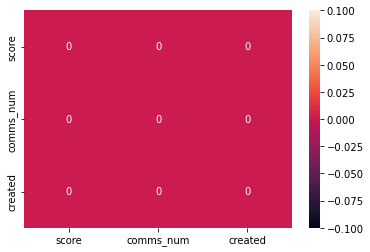

In [17]:
myCorr = mythdata.corr()
sns.heatmap(myCorr.isnull(), annot = True)            

<AxesSubplot:>

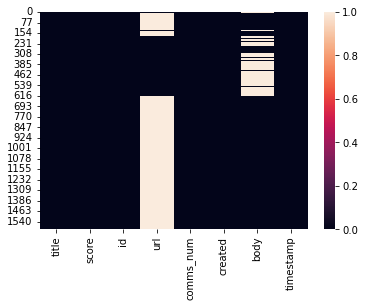

In [18]:
sns.heatmap(mythdata.isnull())

In [19]:
mythdata['title']

0       Health Canada approves AstraZeneca COVID-19 va...
1       COVID-19 in Canada: 'Vaccination passports' a ...
2       Coronavirus variants could fuel Canada's third...
3       Canadian government to extend COVID-19 emergen...
4       Canada: Pfizer is 'extremely committed' to mee...
                              ...                        
1592                                              Comment
1593                                              Comment
1594                                              Comment
1595                                              Comment
1596                                              Comment
Name: title, Length: 1597, dtype: object

In [20]:
df=mythdata[mythdata['title']!='Comment']
df=df['title']
df=df.reset_index()

In [22]:
df.head(10)

,index,title
0,0,Health Canada approves AstraZeneca COVID-19 va...
1,1,COVID-19 in Canada: 'Vaccination passports' a ...
2,2,Coronavirus variants could fuel Canada's third...
3,3,Canadian government to extend COVID-19 emergen...
4,4,Canada: Pfizer is 'extremely committed' to mee...
5,5,Canada: Oxford-AstraZeneca vaccine approval ex...
6,7,Fuck you anti-vaxxing retards
7,68,COVID-19: Músicos que han recibido la vacuna
8,92,Anti-Vaccine Points Refuted A Thousand Times
9,93,Does the Vitamin K Shot Contain 100mcg of Alum...


In [23]:
df=df.drop(['index'],axis=1)

In [24]:
df=df['title']

In [25]:
df.head(10)

0    Health Canada approves AstraZeneca COVID-19 va...
1    COVID-19 in Canada: 'Vaccination passports' a ...
2    Coronavirus variants could fuel Canada's third...
3    Canadian government to extend COVID-19 emergen...
4    Canada: Pfizer is 'extremely committed' to mee...
5    Canada: Oxford-AstraZeneca vaccine approval ex...
6                        Fuck you anti-vaxxing retards
7         COVID-19: Músicos que han recibido la vacuna
8         Anti-Vaccine Points Refuted A Thousand Times
9    Does the Vitamin K Shot Contain 100mcg of Alum...
Name: title, dtype: object

In [26]:
pd.set_option("display.max_colwidth", None)
df.head()

0                               Health Canada approves AstraZeneca COVID-19 vaccine
1    COVID-19 in Canada: 'Vaccination passports' a near certainty says bio-ethicist
2                               Coronavirus variants could fuel Canada's third wave
3                         Canadian government to extend COVID-19 emergency benefits
4       Canada: Pfizer is 'extremely committed' to meeting vaccine delivery targets
Name: title, dtype: object

In [27]:
#importing Required Libraries to do preprocess and analyze LSA and LSA algorithms. 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
print(len(STOP_WORDS))
print(STOP_WORDS)

326
{'put', 'thence', 'except', 'i', 'but', 'about', 'part', 'whence', 'out', 'moreover', 'six', 'because', 'the', '’ll', 'via', 'such', '’s', 'top', 'thereupon', 'throughout', '‘s', 'or', 'while', 'she', 'give', 'whither', 'nowhere', 'hereby', 'by', 'why', 'herself', 'yourself', 'across', 'indeed', 'alone', 'ever', 'none', 'may', 'toward', 'our', 'would', 'among', 'more', 'third', 'with', 'beyond', 'was', 'not', 'seem', 'something', 'hereafter', 'yet', 'seemed', 'mostly', 'there', 'from', 'under', 'nor', 'well', 'here', '’m', 'always', 'others', 'became', 'front', 'nine', 'on', 'will', 'much', 'made', 'do', 'fifteen', "'ll", '’ve', 'ca', 'along', 'enough', 'above', 'anywhere', 'next', 'if', 'whereas', 'whenever', 'everywhere', 'empty', 'off', 'becoming', 'amount', 'five', 'since', 'most', 'in', 'yours', 'against', 'into', 'side', 'afterwards', 'below', '‘m', 'various', '’re', 'least', 'anyway', 'one', 'any', 'say', 'twelve', 'my', 'now', 'his', 'after', 'hundred', 'besides', 'onto', '

In [29]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
  
STOPWORDS = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in text.lower().split() if i not in STOPWORDS and len(i) > 3])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
cleaned_document = [clean_text(text).split() for text in df]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
cleaned_document

[['health', 'canada', 'approves', 'astrazeneca', 'covid19', 'vaccine'],
 ['covid19',
  'canada',
  'vaccination',
  'passport',
  'near',
  'certainty',
  'say',
  'bioethicist'],
 ['coronavirus', 'variant', 'fuel', 'canada', 'wave'],
 ['canadian', 'government', 'extend', 'covid19', 'emergency', 'benefit'],
 ['canada',
  'pfizer',
  'extremely',
  'committed',
  'meeting',
  'vaccine',
  'delivery',
  'target'],
 ['canada', 'oxfordastrazeneca', 'vaccine', 'approval', 'expected', 'week'],
 ['fuck', 'antivaxxing', 'retard'],
 ['covid19', 'músicos', 'recibido', 'vacuna'],
 ['antivaccine', 'point', 'refuted', 'thousand', 'time'],
 ['vitamin', 'shot', 'contain', '100mcg', 'aluminum'],
 ['100', 'injected', 'aluminum', 'absorbed'],
 ['vaccine',
  'debate',
  'group',
  'jut',
  'started',
  'you’re',
  'interested',
  'joining'],
 ['biologically', 'possible', 'insert', 'tracker', 'human', 'vaccine'],
 ['homeopath', 'and', 'scam', 'practitioner', 'peddling', 'dangerous', 'myth'],
 ['reason', '

In [36]:
def topwords(n_top_words, count_vectorizer, text_data):
  
    vect_textlines = count_vectorizer.fit_transform(text_data.values)
    vect_full = np.sum( vect_textlines, axis=0)
    word_indices = np.flip(np.argsort(vect_full )[0,:], 1)
    word_values = np.flip(np.sort(vect_full)[0,:],1)
    
    word_vectors = np.zeros((n_top_words,  vect_textlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

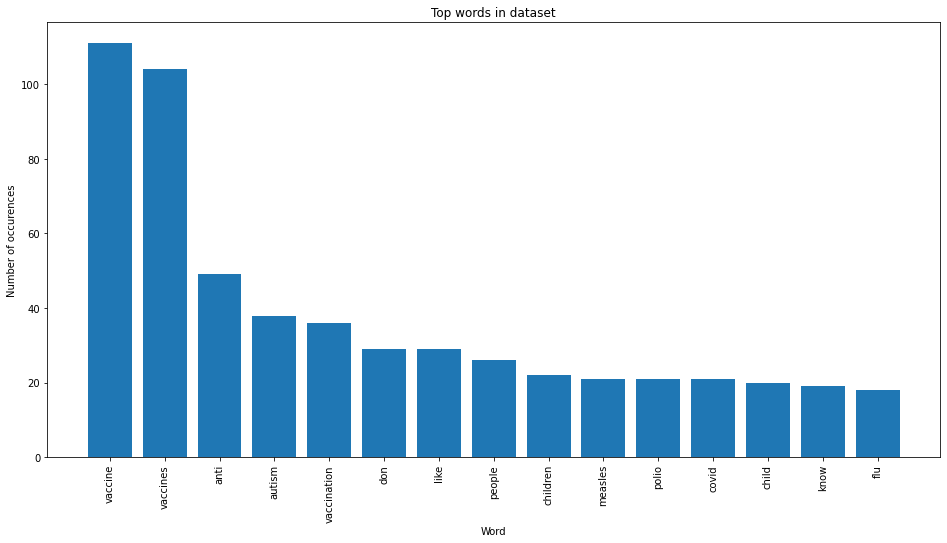

In [37]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = topwords(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in dataset');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [38]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tagged_tweet = [TextBlob(df[i]).pos_tags for i in range(df.shape[0])]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manso\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\manso\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [39]:
tag_tweets = pd.DataFrame({'tags':tagged_tweet})

word_counts = [] 
pos_counts = {}

for tweet in tag_tweets[u'tags']:
    word_counts.append(len(tweet))
    for tag in tweet:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total Number of Words: ', np.sum(word_counts))
print('Mean Number of Words Each Post: ', np.mean(word_counts))

Total Number of Words:  7860
Mean Number of Words Each Post:  16.83083511777302


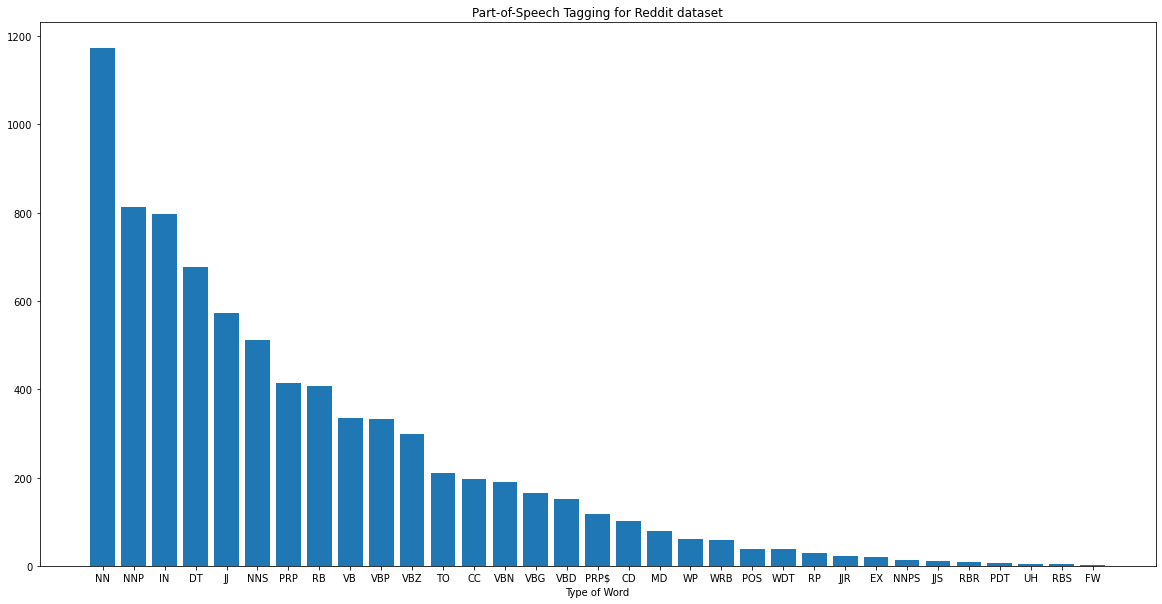

In [40]:
post_sor_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
post_sor_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(range(len(pos_counts)), post_sor_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(post_sor_types);
ax.set_title('Part-of-Speech Tagging for Reddit dataset');
ax.set_xlabel('Type of Word');

In [41]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df.sample(n=100, random_state=0).values

print('Post Before vectorization: {}'.format(small_text_sample[9]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Post After vectorization: \n{}'.format(small_document_term_matrix[9]))

Post Before vectorization: Measles vaccination urged amid Disneyland outbreak
Post After vectorization: 
  (0, 350)	1
  (0, 594)	1
  (0, 587)	1
  (0, 34)	1
  (0, 182)	1
  (0, 390)	1


In [42]:
n_topics = 5

In [43]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [44]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [45]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [46]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [47]:
top_n_words_lsa = get_top_n_words(11, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  vaccines measles autism truth like vaccinated really don industry big proof
Topic 2:  vaccine don covid dr medical history children people til news new
Topic 3:  like fwd scumbags industry use childrens running arose majority secure haven
Topic 4:  vaccination anti flu help vaccinations fuck don say studies protect podcast
Topic 5:  vax anti comment bots aunt article section arguments restaurants argued chili


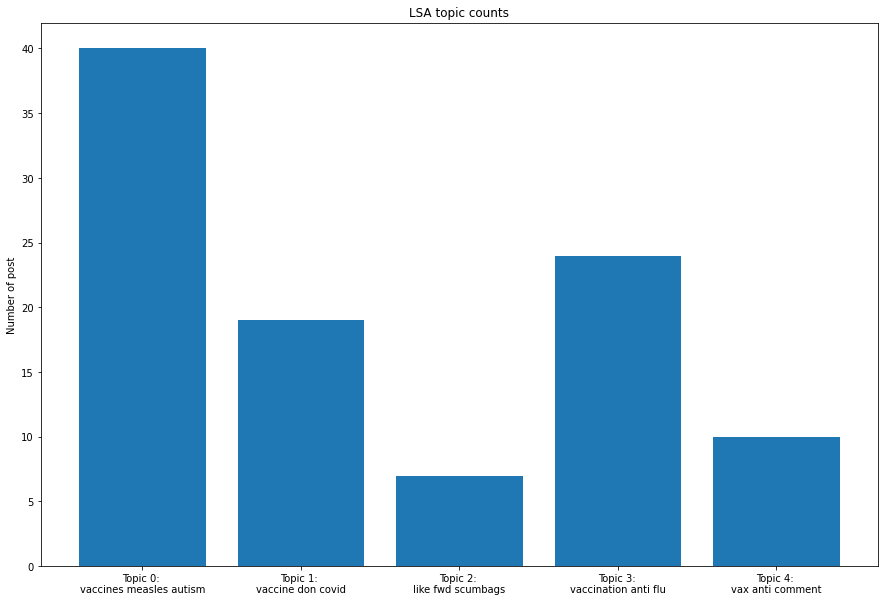

In [48]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of post');
ax.set_title('LSA topic counts');
plt.show()

In [49]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.008s...
[t-SNE] Computed neighbors for 100 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.576388
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.257305
[t-SNE] KL divergence after 800 iterations: 0.073270


In [50]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [51]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [52]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

In [53]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [54]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [55]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  vaccines anti measles truth dihydrogen blog check reviews contain april
Topic 2:  vaccine dr health work autism kids til polio 80 don
Topic 3:  vaccines comment industry said make having section scumbags bots murdering
Topic 4:  vaccines flu non children vaccination review medical measles person isn
Topic 5:  vaccines vaccine don like anti vaccination people vaccinations help fwd


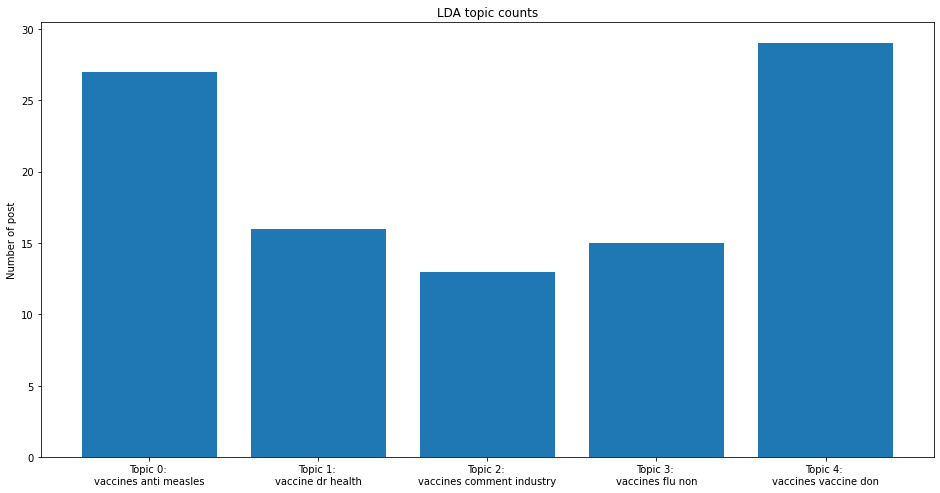

In [56]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of post');

In [57]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.736287
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.017986
[t-SNE] KL divergence after 1450 iterations: 0.032563


In [58]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [61]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(cleaned_document, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(cleaned_document)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=4,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.012*"vaccine" + 0.006*"antivax" + 0.004*"people" + 0.004*"vaccination" + 0.003*"immune" + 0.003*"parent" + 0.003*"covid19" + 0.003*"vaccinated" + 0.003*"know" + 0.003*"kid"'),
 (1,
  '0.014*"vaccine" + 0.012*"child" + 0.007*"measles" + 0.007*"like" + 0.006*"vaccination" + 0.004*"vaccinated" + 0.004*"vaccinate" + 0.004*"people" + 0.003*"immunity" + 0.002*"believe"'),
 (2,
  '0.029*"vaccine" + 0.010*"autism" + 0.005*"cause" + 0.005*"vaccination" + 0.004*"polio" + 0.003*"them" + 0.003*"work" + 0.003*"like" + 0.003*"study" + 0.003*"child"'),
 (3,
  '0.024*"vaccine" + 0.005*"vaccination" + 0.004*"help" + 0.004*"autism" + 0.003*"pharma" + 0.003*"need" + 0.003*"know" + 0.003*"covid" + 0.003*"cancer" + 0.003*"shot"')]

In [62]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Automated_topic_id
0,0.055170,0.047529,0.045387,0.851914,3
1,0.888263,0.036752,0.038307,0.036678,0
2,0.845127,0.052085,0.050979,0.051809,0
3,0.860886,0.045193,0.047551,0.046369,0
4,0.036378,0.889652,0.036127,0.037842,1


In [63]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nLDA Coherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nLDA Coherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -7.593914358682901

LDA Coherence Score using c_v:  0.506756675497816

LDA Coherence Score using u_mass:  -14.045941582608602


In [64]:
conda install -c conda-forge pyldavis

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
from pyLDAvis import gensim
import pyLDAvis

In [66]:
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensim.prepare(lda_model, doc_term_matrix, dictionary)

In [67]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.026940  0.012816       1        1  27.083223
1      0.025882 -0.020070       2        1  25.689622
2     -0.018113 -0.019463       3        1  24.542074
0      0.019170  0.026717       4        1  22.685080, topic_info=        Term       Freq      Total Category  logprob  loglift
214    child  16.000000  16.000000  Default  30.0000  30.0000
97    autism  14.000000  14.000000  Default  29.0000  29.0000
221  measles   8.000000   8.000000  Default  28.0000  28.0000
5    vaccine  73.000000  73.000000  Default  27.0000  27.0000
109  antivax   7.000000   7.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
99     think   1.984324   7.387740   Topic4  -6.0568   0.1689
347    study   1.639829   6.973925   Topic4  -6.2474   0.0359
214    child   2.021277  16.414327   Topic4  -6.0383  -0.6110
221  measles   1.416206   8.867773   Topic4  -6.3941  -0.3510
541     bill   1.314144   3.384796   Topic4  -6.4689   0.5374

[261 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1058      4  0.433473  activist
608       2  0.492931     agent
1379      1  0.413206       aid
683       1  0.715864       all
1402      1  0.413241   allergy
...     ...       ...       ...
517       3  0.424432     wrong
630       1  0.190997      year
630       2  0.381995      year
630       3  0.190997      year
630       4  0.190997      year

[394 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [68]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
lsi_model.print_topics(num_topics=5,num_words=5)

[(0,
  '-0.922*"vaccine" + -0.153*"autism" + -0.115*"child" + -0.099*"polio" + -0.095*"cause"'),
 (1,
  '0.624*"child" + 0.372*"vaccination" + -0.231*"vaccine" + 0.194*"like" + 0.181*"autism"'),
 (2,
  '0.625*"autism" + -0.392*"polio" + -0.248*"people" + 0.217*"cause" + -0.169*"vaccination"'),
 (3,
  '0.666*"vaccination" + -0.395*"child" + -0.227*"like" + 0.208*"autism" + 0.138*"study"'),
 (4,
  '-0.601*"polio" + -0.308*"autism" + 0.217*"like" + -0.189*"vapp" + -0.182*"measles"')]

In [69]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for lsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)


Coherence Score for LSI using c_v:  0.4472858289465017

Coherence Score for LSI using u_mass:  -14.294249270817398


In [70]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


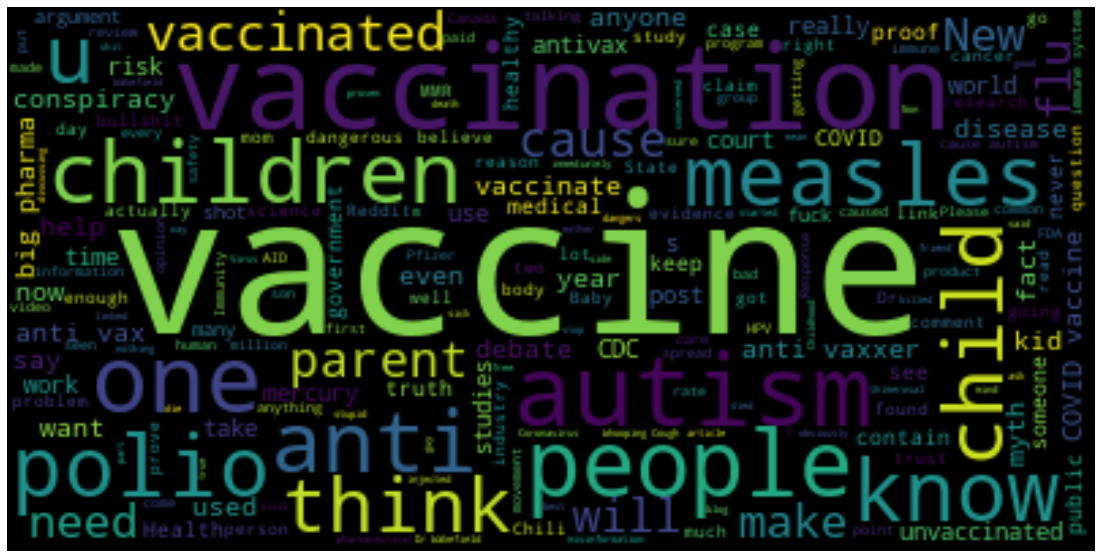

In [71]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


strings_no_comment = " ".join(df)
wordcloud = WordCloud().generate(strings_no_comment)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()